## 1. Import Everything

### 1.1. Import Libraries

In [14]:
import numpy as np
import pandas
import tensorflow as tf
import csv
import os
import pylab as plt

### 1.2. Set Parameters

In [6]:
MAX_DOCUMENT_LENGTH = 100
HIDDEN_SIZE = 20
MAX_LABEL = 15
EMBEDDING_SIZE = 50

no_epochs = 100
lr = 0.01

tf.logging.set_verbosity(tf.logging.ERROR)
seed = 10
tf.set_random_seed(seed)

DATA_DIR = "./resource"

## 2. Define Helper Function

### 2.1. Helper Function for Loading Data

In [7]:
def data_read_words():
  
    x_train, y_train, x_test, y_test = [], [], [], []
    TRAIN_FILENAME = 'train_medium.csv'
    TEST_FILENAME = "test_medium.csv"
    
    with open(os.path.join(DATA_DIR, TRAIN_FILENAME), encoding='utf-8') as filex:
        reader = csv.reader(filex)
        for row in reader:
            x_train.append(row[2])
            y_train.append(int(row[0]))

    with open(os.path.join(DATA_DIR, TEST_FILENAME), encoding='utf-8') as filex:
        reader = csv.reader(filex)
        for row in reader:
            x_test.append(row[2])
            y_test.append(int(row[0]))

    x_train = pandas.Series(x_train)
    y_train = pandas.Series(y_train)
    x_test = pandas.Series(x_test)
    y_test = pandas.Series(y_test)
    y_train = y_train.values
    y_test = y_test.values

    vocab_processor = tf.contrib.learn.preprocessing.VocabularyProcessor(
        MAX_DOCUMENT_LENGTH)

    x_transform_train = vocab_processor.fit_transform(x_train)
    x_transform_test = vocab_processor.transform(x_test)

    x_train = np.array(list(x_transform_train))
    x_test = np.array(list(x_transform_test))

    no_words = len(vocab_processor.vocabulary_)
    print('Total words: %d' % no_words)

    return x_train, y_train, x_test, y_test, no_words

### 2.2. Helper Function for RNN

In [2]:
def rnn_model(x):

    word_vectors = tf.contrib.layers.embed_sequence(
        x, vocab_size=n_words, embed_dim=EMBEDDING_SIZE)

    word_list = tf.unstack(word_vectors, axis=1)

    cell = tf.nn.rnn_cell.GRUCell(HIDDEN_SIZE)
    _, encoding = tf.nn.static_rnn(cell, word_list, dtype=tf.float32)

    logits = tf.layers.dense(encoding, MAX_LABEL, activation=None)

    return logits, word_list

## 3. Handle Data and Model

### 3.1. Load in Data

In [9]:
global n_words
x_train, y_train, x_test, y_test, n_words = data_read_words()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Total words: 38658
(5600, 100) (5600,)
(700, 100) (700,)


### 3.2. Create the Model

In [10]:
x = tf.placeholder(tf.int64, [None, MAX_DOCUMENT_LENGTH])
y_ = tf.placeholder(tf.int64)

logits, word_list = rnn_model(x)

entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=tf.one_hot(y_, MAX_LABEL), logits=logits))
train_op = tf.train.AdamOptimizer(lr).minimize(entropy)

## 4. RUN!!!!

In [11]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [12]:
# training
loss = []
for e in range(no_epochs):
    word_list_, _, loss_  = sess.run([word_list, train_op, entropy], {x: x_train, y_: y_train})
    loss.append(loss_)

    if e%10 == 0:
        print('epoch: %d, entropy: %g'%(e, loss[e]))

epoch: 0, entropy: 2.70874
epoch: 10, entropy: 2.61498
epoch: 20, entropy: 2.11327
epoch: 30, entropy: 1.9908
epoch: 40, entropy: 1.76666
epoch: 50, entropy: 1.37886
epoch: 60, entropy: 1.00852
epoch: 70, entropy: 0.714895
epoch: 80, entropy: 0.403367
epoch: 90, entropy: 0.208247


## 5. Plot Graph

In [13]:
print(loss)

[2.7087355, 2.695521, 2.6849673, 2.6762092, 2.6667118, 2.658575, 2.6502922, 2.6431928, 2.63818, 2.630701, 2.6149833, 2.5735767, 2.4971616, 2.408225, 2.3398645, 2.2760139, 2.224969, 2.1825228, 2.1463494, 2.1237633, 2.1132677, 2.1098902, 2.1043549, 2.09437, 2.076878, 2.0610375, 2.0474446, 2.0333622, 2.016702, 2.003241, 1.9907987, 1.9790936, 1.9666286, 1.9508852, 1.9305481, 1.9078038, 1.8826848, 1.8567389, 1.8290834, 1.7992, 1.76666, 1.7313273, 1.6937641, 1.6545082, 1.6141151, 1.5736454, 1.5341545, 1.4951661, 1.456048, 1.417192, 1.378864, 1.3413681, 1.3047532, 1.2683915, 1.2320496, 1.1951003, 1.1580349, 1.1208994, 1.0834072, 1.045036, 1.008517, 0.97801965, 1.0092307, 0.9879778, 0.9820717, 0.89911395, 0.8553284, 0.82989013, 0.7985873, 0.7582053, 0.7148951, 0.67892605, 0.64107734, 0.608729, 0.57433885, 0.54395276, 0.51207596, 0.48347706, 0.45599243, 0.42990783, 0.40336657, 0.37990192, 0.3551796, 0.33215815, 0.30878252, 0.2879401, 0.26912352, 0.25275403, 0.2363392, 0.22172843, 0.20824668, 0.

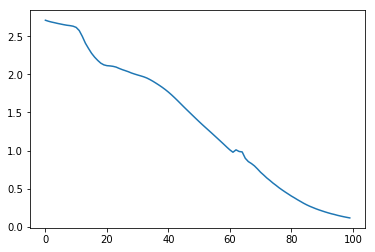

In [15]:
plt.plot(range(len(loss)),loss)